In [3]:
import numpy as np
import sys
sys.path
sys.path.insert(0, '/Users/asaadeldin/Downloads/GitHub/scipy')
sys.path.insert(0, '/Users/asaadeldin/Downloads/GitHub/graspologic')
from scipy.optimize import quadratic_assignment


In [4]:
from qap_sim import quadratic_assignment_sim

In [5]:
NUM_EMBS = 5000
envecs = open('data/wiki.en.align.vec.' + str(NUM_EMBS))
devecs = open('data/wiki.de.align.vec.' + str(NUM_EMBS))
seed_words = open('dicts/demo/en-de/en-de.demo.train.txt')
test_pairs= open('dicts/demo/en-de/en-de.demo.test.txt')

In [6]:
print(seed_words)

<_io.TextIOWrapper name='dicts/demo/en-de/en-de.demo.train.txt' mode='r' encoding='UTF-8'>


In [7]:
def read(file, threshold=0, vocabulary=None, dtype='float'):
    header = file.readline().split(' ')
    count = int(header[0]) if threshold <= 0 else min(threshold, int(header[0]))
    dim = int(header[1])
    words = {}
    matrix = np.empty((count, dim), dtype=dtype) if vocabulary is None else []
    for i in range(count):
        word, vec = file.readline().split(' ', 1)
        words[word] = i
        if vocabulary is None:
            matrix[i] = np.fromstring(vec, sep=' ', dtype=dtype)
        elif word in vocabulary:
            matrix.append(np.fromstring(vec, sep=' ', dtype=dtype))
    return (words, matrix) if vocabulary is None else (words, np.array(matrix, dtype=dtype))

words_A1, mono_A1 = read(envecs)
words_A2, mono_A2 = read(devecs)

In [8]:
from sklearn.metrics.pairwise import euclidean_distances
from graspologic.align import OrthogonalProcrustes, SeedlessProcrustes
def run_alignments(X, Y):
    op = OrthogonalProcrustes()
    X_trans_op = op.fit_transform(X, Y)
    sp = SeedlessProcrustes(init="custom", initial_Q=op.Q_)
    X_trans_sp = sp.fit_transform(X, Y)
    return X_trans_op, X_trans_sp





In [112]:
def eval(test_pairs, m1_words, m2_words, P):
    num_correct = 0
    total = 0
    for test_pair in test_pairs:
        m1_word, m2_word = test_pair.split()
        print(m1_word)
        print(m2_word)
        m1_pos = m1_words.get(m1_word)
        m2_pos = m2_words.get(m2_word)
        print(m1_pos)
        print(m2_pos)
        if m1_pos and m2_pos and P[m1_pos] == m2_pos:
            print('Match:', m1_word, m2_word)
            num_correct += 1
        total += 1
    return (num_correct, total)


In [215]:
def get_eval_pairs(m1_words, m2_words, dev_pairs, remove_impossible_pairs=True):
    # remove_impossible_pairs=True removes pairs from the eval list if the src
    # and trg eval word are not present in the relevant word set.
    if not remove_impossible_pairs:
        return dev_pairs

    possible_pairs = set()
    for m1_word, m2_word in dev_pairs:
        m1_pos = m1_words.get(m1_word)
        m2_pos = m2_words.get(m2_word)
        if m1_pos and m2_pos:
            possible_pairs.add((m1_word, m2_word))
    return possible_pairs 


def eval(eval_pairs, m1_words, m2_words, P, remove_impossible_pairs=True):
    eval_pairs = get_eval_pairs(m1_words, m2_words, eval_pairs,
            remove_impossible_pairs)
    print(eval_pairs)
    matches = set()

    for m1_word, m2_word in eval_pairs:
        m1_pos = m1_words.get(m1_word)
        m2_pos = m2_words.get(m2_word)
        if m1_pos and m2_pos and P[m1_pos] == m2_pos:
            matches.add((m1_word, m2_word)) 
    
    ratio = float(len(matches)) / len(eval_pairs)

    return matches, eval_pairs, ratio

In [216]:
 matches, eval_pairs, ratio = eval(test_pairs, words_A1, words_A2, res.col_ind)

set()


ZeroDivisionError: float division by zero

<AxesSubplot:>

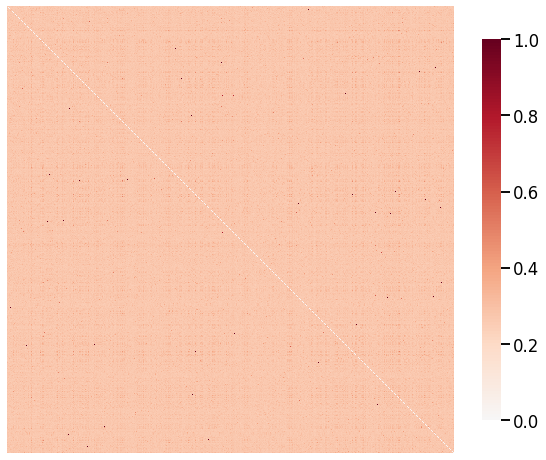

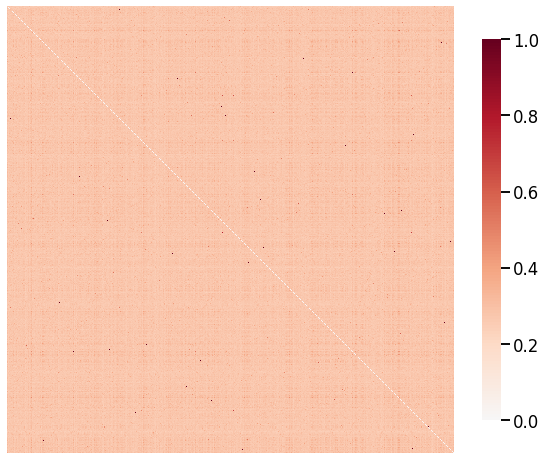

In [35]:
from graspologic.plot import heatmap
A = np.exp(-pdist(xhat))
A[rang, rang] = 0
B = np.exp(-pdist(yhat))
B[rang, rang] = 0
heatmap(A)
heatmap(B)

In [9]:
pairs = [test_pair.split() for test_pair in test_pairs]
print(pairs)

[['borough', 'stadtbezirk'], ['predecessor', 'vorgängerin'], ['yard', 'werft'], ['continues', 'weiterhin'], ['honours', 'ehren'], ['southern', 'südliche'], ['ruler', 'herrscher'], ['operational', 'betriebsbereit'], ['admiral', 'admiral'], ['america', 'mittelamerika'], ['solo', 'solo'], ['twice', 'twice'], ['title', 'titel'], ['defending', 'verteidigt'], ['scientist', 'informatiker'], ['seal', 'dichtung'], ['reached', 'erreichte'], ['prepared', 'vorbereitet'], ['gone', 'weg'], ['southern', 'süd'], ['kingdom', 'königreich'], ['zealand', 'zealand'], ['duke', 'großherzog'], ['merge', 'verschmelzen'], ['reasons', 'gründen'], ['wedding', 'heiraten'], ['justify', 'rechtfertigung'], ['speakers', 'redner'], ['disaster', 'desaster'], ['electric', 'elektrizität'], ['familiar', 'vertraut'], ['commander', 'commander'], ['distribution', 'vertrieb'], ['means', 'meint'], ['girls', 'girls'], ['rush', 'eile'], ['positive', 'positive'], ['priest', 'priester'], ['create', 'erstelle'], ['visitors', 'besuch

In [10]:
print(len(pairs))
s = 0
pi = []
loc_a1 = []
loc_a2 = []
for i in pairs:
    if i[0] in words_A1 and i[1] in words_A2:
        pi += [[i[0],i[1]]]
        loc_a1 += [words_A1[i[0]]]
        loc_a2 += [words_A2[i[1]]]
        
        s+=1
        
print(s)

2000
747


In [11]:
print(pi)
print(mono_A1[words_A1[pi[0][0]]])
print(mono_A2[words_A2[pi[0][1]]])

[['borough', 'stadtbezirk'], ['continues', 'weiterhin'], ['honours', 'ehren'], ['southern', 'südliche'], ['solo', 'solo'], ['title', 'titel'], ['reached', 'erreichte'], ['gone', 'weg'], ['southern', 'süd'], ['kingdom', 'königreich'], ['reasons', 'gründen'], ['means', 'meint'], ['positive', 'positive'], ['priest', 'priester'], ['visitors', 'besuch'], ['introduced', 'eingeführt'], ['reader', 'leser'], ['reserve', 'naturschutzgebiet'], ['resigned', 'trat'], ['pieces', 'teile'], ['daily', 'täglich'], ['ownership', 'eigentum'], ['level', 'stufe'], ['profession', 'beruf'], ['australia', 'australien'], ['helpful', 'hilfreich'], ['universities', 'hochschule'], ['sell', 'verkauf'], ['five', 'fünf'], ['mostly', 'meist'], ['big', 'großes'], ['conductor', 'dirigent'], ['texts', 'texte'], ['cultural', 'kulturelle'], ['illinois', 'illinois'], ['extension', 'erweiterung'], ['about', 'über'], ['fame', 'bekanntheit'], ['district', 'district'], ['premiere', 'premiere'], ['apparently', 'offensichtlich'],

In [12]:
xhat = mono_A1[loc_a1,:]
yhat = mono_A2[loc_a2,:]
print(xhat.shape)
print(yhat.shape)


(747, 300)
(747, 300)


In [13]:
xhat_op, xhat_sp = run_alignments(xhat, yhat)

In [14]:
from sklearn.metrics import pairwise_distances as pdist
from scipy.optimize import linear_sum_assignment
rang = np.arange(747)
A = np.exp(-pdist(xhat))
# A[rang, rang] = 0
B = np.exp(-pdist(yhat))
# B[rang, rang] = 0
res = quadratic_assignment_sim(A,B, None, options={'maximize':True, 'shuffle_input':True, 'eps': 1e-14})
acc = np.sum(res.col_ind == np.arange(747))/747
print('Accuracy for GM(A, B) = ', acc)

S = np.exp(-pdist(xhat,yhat))
row, col = linear_sum_assignment(S, maximize = True)
print('Accuracy for vn via S (no alignment)  = ', np.sum(col == np.arange(747))/747)

S_sp = np.exp(-pdist(xhat_sp,yhat))
row, col = linear_sum_assignment(S_sp, maximize = True)
print('Accuracy for vn via S (SeedlessProcrustes)  = ', np.sum(col == np.arange(747))/747)

S_op = np.exp(-pdist(xhat_op,yhat))
row, col = linear_sum_assignment(S_op, maximize = True)
print('Accuracy for vn via S (OrthogonalProcrustes)  = ', np.sum(col == np.arange(747))/747)

res = quadratic_assignment_sim(A,B, S, options={'maximize':True,'shuffle_input':True, 'eps': 1e-14})
acc = np.sum(res.col_ind == np.arange(747))/747
print('Accuracy for GM(A, B, S (no alignemnt)) = ', acc)

res = quadratic_assignment_sim(A,B, S_sp, options={'maximize':True,'shuffle_input':True, 'eps': 1e-14})
acc = np.sum(res.col_ind == np.arange(747))/747
print('Accuracy for GM(A, B, S (SeedlessProcrustes)) = ', acc)

res = quadratic_assignment_sim(A,B, S_op, options={'maximize':True,'shuffle_input':True, 'eps': 1e-14})
acc = np.sum(res.col_ind == np.arange(747))/747
print('Accuracy for GM(A, B, S (OrthogonalProcrustes)) = ', acc)


# As = pdist(xhat)
# Bs = pdist(yhat)

# # A = xhat @ xhat.T
# # B = yhat @ yhat.T
# A[A<0] = 0
# B[B<0] = 0
# res = quadratic_assignment(A,B, options={'maximize':True, 'shuffle_input':True, 'tol': 1e-20})

Accuracy for GM(A, B) =  0.00535475234270415
Accuracy for vn via S (no alignment)  =  0.7630522088353414
Accuracy for vn via S (SeedlessProcrustes)  =  0.7724230254350736
Accuracy for vn via S (OrthogonalProcrustes)  =  0.9143239625167336
Accuracy for GM(A, B, S (no alignemnt)) =  0.678714859437751
Accuracy for GM(A, B, S (SeedlessProcrustes)) =  0.7336010709504686
Accuracy for GM(A, B, S (OrthogonalProcrustes)) =  0.8460508701472557


In [421]:
np.savetxt('english_emb.csv', xhat, delimiter = ',')
np.savetxt('german_emb.csv', yhat, delimiter = ',')

In [36]:
import random
n = 747
seed = random.sample(range(0, n), 10)
partial_match = np.column_stack((seed, seed))

# op = OrthogonalProcrustes()
# X_trans_op = op.fit_transform(X, Y)

print(seed)
res = quadratic_assignment_sim(A,B, S_op, options={'maximize':True,'shuffle_input':True, 'eps': 1e-40, 'seed':0})
acc = np.sum(res.col_ind == np.arange(747))/747
print('Accuracy for GM(A, B, S)  =', acc)

res = quadratic_assignment_sim(A,B, S_op, options={'maximize':True,'shuffle_input':True, 'eps': 1e-40, 'seed':0,'partial_match': partial_match})
acc = np.sum(res.col_ind == np.arange(747))/747
print('Accuracy for GM(A, B, S) 10 random seeds = ', acc)


[286, 540, 1, 686, 670, 515, 713, 285, 266, 70]
Accuracy for GM(A, B, S)  = 0.8473895582329317
Accuracy for GM(A, B, S) 10 random seeds =  0.8500669344042838


In [37]:
row, col = linear_sum_assignment(S)
np.sum(col == np.arange(747))

0

In [410]:
print(S)

[[0.50243033 0.27576487 0.27997335 ... 0.2618348  0.27602915 0.26099029]
 [0.27736284 0.39419788 0.27171186 ... 0.26397002 0.27209932 0.30810056]
 [0.27301309 0.28349174 0.41978111 ... 0.25133724 0.28064845 0.27495836]
 ...
 [0.26827792 0.27498444 0.27906405 ... 0.55209836 0.27941138 0.26603397]
 [0.25485126 0.29311665 0.2655598  ... 0.27608489 0.53885672 0.2988042 ]
 [0.26657085 0.35664354 0.2676472  ... 0.28279353 0.29467782 0.52924253]]


In [415]:
res = quadratic_assignment_sim(A,B, True, S, options={'shuffle_input':True, 'eps': 1e-14})

In [416]:
np.sum(res.col_ind == np.arange(747))/747

0.6854082998661312

In [377]:
reps = 10
acc_s = np.zeros(reps)
acc = np.zeros(reps)
for i in range(reps):
    res = quadratic_assignment_sim(A,B, True, S, options={'shuffle_input':True, 'eps': 1e-14})
    acc[i] = np.sum(res.col_ind == np.arange(747))/747
    res = quadratic_assignment_sim(As,Bs, True, S, options={'shuffle_input':True, 'eps': 1e-14})
    acc_s[i] = np.sum(res.col_ind == np.arange(747))/747

In [381]:
from scipy.stats import sem
print(np.mean(acc_s))
print(sem(acc_s))
print(np.mean(acc))
print(sem(acc))

0.49170013386880856
0.00126291581419767
0.7390896921017404
0.0032574743418116964


In [384]:
print(res)
print(pairs[1])
print(pairs[107])
print(pairs[113])
print(pairs[5])

 col_ind: array([  0, 107,   2,   3,   4, 113, 504,   7, 493,   9, 418, 653,  12,
       143, 543, 668,  16,  17, 254,  19,  20,  21,  22, 481,  24,  25,
       388, 457,  28, 196,  30, 737,  32,  33,  34,  74,  36,  37,  38,
        39,  40,  41,  42,  44,  43,  45,  46, 160,  48,  49, 450,  51,
        52,  53,  54,  84,  56, 702,  58, 564, 185,  61,  62, 530,  64,
        65,  66, 699, 348,  69, 225, 282, 719, 338, 487, 680,  76,  77,
       177,  79,  80, 636,  82,  83, 583,  85, 613, 403, 496, 304,  90,
        89,  92, 476, 359,  95,  96,  97,  98,  99, 586, 198, 102, 717,
       104, 536, 690, 599, 517, 596, 110, 473, 449, 502, 114, 115,  14,
       205, 118, 119, 120, 285, 712, 136, 124, 125, 516, 251, 466, 129,
       664,  55, 677, 133, 134, 135, 632, 137, 138, 139, 140, 467, 142,
       221, 144, 145, 233, 147, 100, 149, 150, 151, 417, 153, 513, 155,
       224, 152, 456, 159, 410, 161, 726, 703, 162,  87, 166, 346, 168,
        23, 247, 105,  75, 173, 372, 175, 352, 108,  7

In [284]:
from graspologic.embed import AdjacencySpectralEmbed, select_dimension
from graspologic.utils import augment_diagonal, pass_to_ranks

def screeplot(sing_vals, elbow_inds, color=None, ax=None, label=None):
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(8, 4))
    plt.plot(range(1, len(sing_vals) + 1), sing_vals, color=color, label=label)
    ax.set(ylabel="Singular value", xlabel="Index")
    return ax


def embed(adj, n_components=40):
    ase = AdjacencySpectralEmbed(n_components=n_components)
    out_latent, in_latent = ase.fit_transform(adj)
    return out_latent, in_latent, ase.singular_values_

n_components = 8
max_n_components = 40

left_out_latent, left_in_latent, left_sing_vals = embed(
    A, n_components=max_n_components
)
right_out_latent, right_in_latent, right_sing_vals = embed(
    B, n_components=max_n_components
)

# plot the screeplot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
screeplot(left_sing_vals, color=palette["Left"], ax=ax, label="Left")
screeplot(
    right_sing_vals, color=palette["Right"], ax=ax, label="Right"
)
ax.legend()
ax.axvline(n_components, color="black", linewidth=1.5, linestyle="--")
stashfig("screeplot")

ValueError: too many values to unpack (expected 2)

In [285]:
ase = AdjacencySpectralEmbed(n_components=n_components)


UserWarning: Current pass-to-ranks on graphs with negative weights will yield nonsensical results, especially for zero-boost

In [290]:
print(np.sum(A<0))

308


In [334]:
from graspologic.embed import selectSVD
u,sa, vh = selectSVD(xhat, n_components=40)
u,sb, vh = selectSVD(yhat,n_components=40)

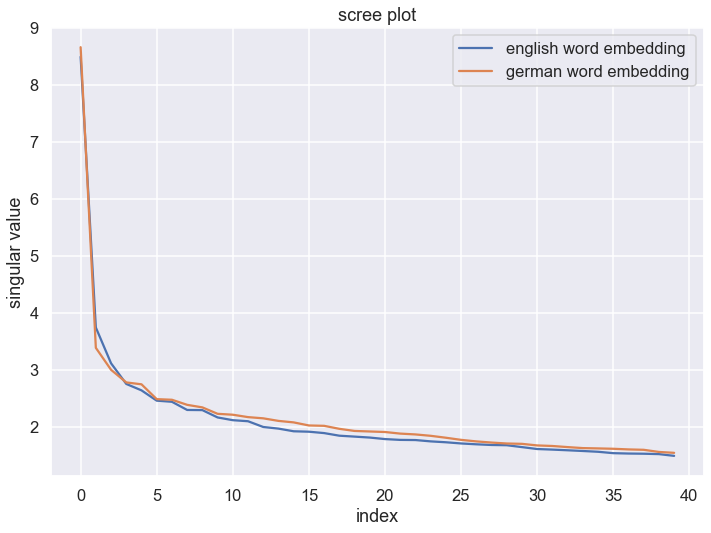

In [333]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk')

plt.plot(np.arange(40), sa[:40], label='english word embedding')
plt.plot(np.arange(40), sb[:40], label ='german word embedding')
plt.ylabel('singular value')
plt.xlabel('index')
plt.title('scree plot')
plt.legend()

In [38]:
S = np.exp(-pdist(xhat[:10,:],yhat[:10,:]))
print(S)
print(S.T)

[[0.29139393 0.2423805  0.24329371 0.25066538 0.22002729 0.22550764
  0.22522853 0.22954768 0.25752636 0.24945886]
 [0.23486008 0.28019752 0.24019025 0.24717299 0.24693044 0.23397438
  0.23427534 0.2649812  0.25091415 0.22771093]
 [0.22508193 0.23665708 0.29397808 0.2289444  0.22322265 0.27292024
  0.24053679 0.23694091 0.22449444 0.24470498]
 [0.23393899 0.2424438  0.23512878 0.32248511 0.23073033 0.23030673
  0.24444586 0.24112521 0.30690998 0.2415105 ]
 [0.22915007 0.24283035 0.23418934 0.22665401 0.3548698  0.24138904
  0.23817337 0.24384904 0.22877952 0.22643648]
 [0.22955263 0.24774247 0.24456849 0.23128792 0.23812148 0.34090975
  0.24976828 0.2395719  0.23768418 0.24368602]
 [0.23434736 0.23455948 0.23649759 0.24618516 0.24425867 0.25887137
  0.34414318 0.26929235 0.24174192 0.25030749]
 [0.21514764 0.25114327 0.23241906 0.23221885 0.23288962 0.24380489
  0.24762547 0.28230417 0.22640578 0.2416301 ]
 [0.23393899 0.2424438  0.23512878 0.32248511 0.23073033 0.23030673
  0.24444586